### Plot a given to_pe value(s) (from gain model) by calling corrections DB

In [1]:
import strax
import straxen
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import pytz

* User can provide a PMT or list of PMTs

In [2]:
passcode = straxen.get_secret('rundb_password')
user = straxen.get_secret('rundb_username')
cmt = strax.CorrectionsInterface('mongodb://xenon1t-daq.lngs.infn.it:27017/xenonnt',user,passcode,'corrections')

In [3]:
def plot_to_pe(pmts,
           t0=datetime(2020, 4, 1, 0, 0, 0, 0, tzinfo=pytz.utc),
           t1=datetime(2020, 10, 26, 0, 0, 0, tzinfo=pytz.utc), 
           version='ONLINE'):
    
    if not isinstance (pmts, list):
        raise ValueError('Please provide a list of pmts')
        
    df = []
    for pmt in pmts:
        name = 'pmt_%03d_gain_xenonnt' % pmt    
        df.append(cmt.read(name))
       
    # litle hacks to make a resonable plot
    myformat = mdates.DateFormatter('%Y-%m-%d')
    label = 'pmt= '+str((df[0]['_pmt'].head())[0])
    ax = df[0].loc[t0:t1].plot(y=version, label =label)
    ax.xaxis.set_major_formatter(myformat)
    ax.set_ylabel('to_pe values')
    ax.set_xlabel('Dates')

    for pmt in range (1,len(df)):       
        ax= df[pmt].loc[t0:t1].plot(y=version,ax=ax, label='pmt= '+str((df[pmt]['_pmt'].head())[0]) )
        ax.xaxis.set_major_formatter(myformat)
        ax.set_ylabel('to_pe values')
        ax.set_xlabel('Dates')
        

    plt.show()

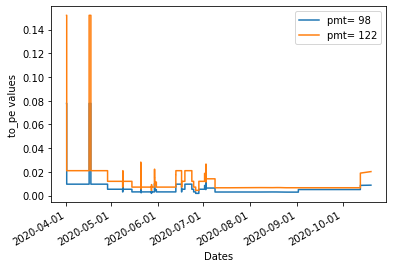

In [4]:
plot_to_pe( [98,122], version='v1')

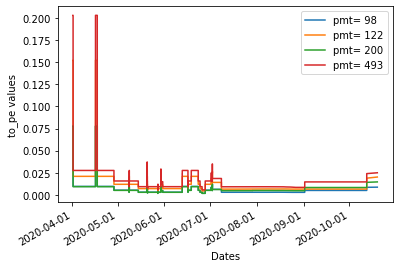

In [5]:
plot_to_pe( [98, 122, 200, 493], version='v1')

In [6]:
plot_to_pe( 22, version='v1')

ValueError: Please provide a list of pmts

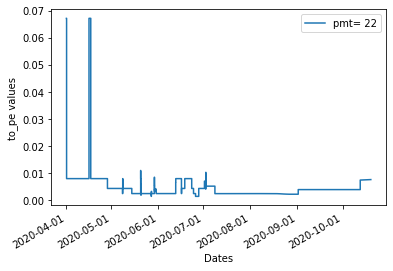

In [7]:
plot_to_pe( [22], version='v1')

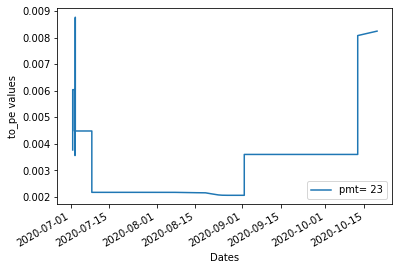

In [8]:
plot_to_pe( [23], t0=datetime(2020, 7, 1, 0, 0, 0, 0, tzinfo=pytz.utc), version='v1')